# Part-I: LDA




### Import libraries

To start off, you will import the required libraries for visualising and analysing the text data.


In [1]:
# Import libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

#1. Load the data

##### Method 1 - Google Colab
- Run the code block below if you're using Google colab for this demonstration and have uploaded the papers.csv file in your Google Drive
- Else, skip this part and move to the next cell block and run it in case you're using Jupyter 

In [3]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv',nrows=10000)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


#2. Data Preparation

In [4]:
import re
# Remove punctuation
df['Review'] = df['Review'].map(lambda x: re.sub('[,\.!?;:]', '', x))

# Convert the titles to lowercase
df['Review'] = df['Review'].map(lambda x: x.lower())

# Print out the first rows of papers
df['Review'].head()

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience hotel monaco seat...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
Name: Review, dtype: object

In [5]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 3. EDA


### Question 1: Which of the following words has the highest frequency in the entire text corpus?

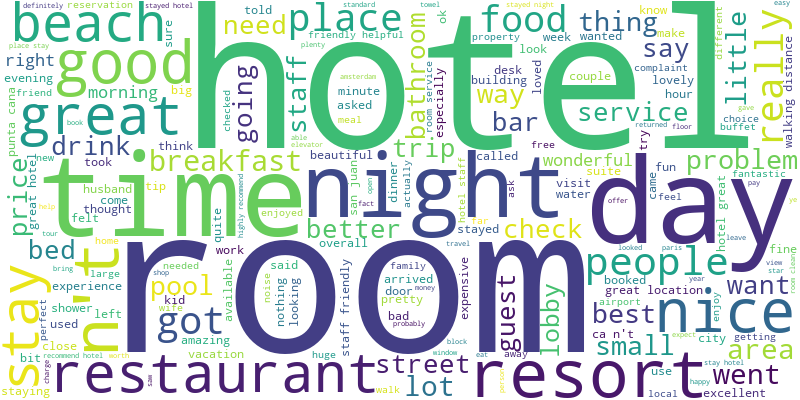

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['Review'].values))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, contour_color='steelblue')

# Generate a word clouds
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()



# 4. LDA analysis

#### 4.1 Import libraries

In [11]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 4.2 Tokenization

In [12]:
# Tokenizing sentences into words
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

#### 4.3 Stopwords removal

In [13]:
stop_words = stopwords.words('english')
#stop_words.extend([])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if (word not in stop_words) and (len(word)>2)] for doc in texts]


In [14]:
data = df.Review.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:10])
print(data_words[1:2][0][:10])

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary']
['nothing', 'special', 'charge', 'diamond', 'member', 'hilton', 'decided', 'chain', 'shot', 'anniversary']


### Question 2: What is the first feature in the second document of the data_words list?

In [15]:
# write your code here
data_words

[['nice',
  'hotel',
  'expensive',
  'parking',
  'got',
  'good',
  'deal',
  'stay',
  'hotel',
  'anniversary',
  'arrived',
  'late',
  'evening',
  'took',
  'advice',
  'previous',
  'reviews',
  'valet',
  'parking',
  'check',
  'quick',
  'easy',
  'little',
  'disappointed',
  'non',
  'existent',
  'view',
  'room',
  'room',
  'clean',
  'nice',
  'size',
  'bed',
  'comfortable',
  'woke',
  'stiff',
  'neck',
  'high',
  'pillows',
  'soundproof',
  'like',
  'heard',
  'music',
  'room',
  'night',
  'morning',
  'loud',
  'bangs',
  'doors',
  'opening',
  'closing',
  'hear',
  'people',
  'talking',
  'hallway',
  'maybe',
  'noisy',
  'neighbors',
  'aveda',
  'bath',
  'products',
  'nice',
  'goldfish',
  'stay',
  'nice',
  'touch',
  'taken',
  'advantage',
  'staying',
  'longer',
  'location',
  'great',
  'walking',
  'distance',
  'shopping',
  'overall',
  'nice',
  'experience',
  'pay',
  'parking',
  'night'],
 ['nothing',
  'special',
  'charge',
  'dia

#5. Term document freqency

In [17]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[1:2][0][:10])

[(2, 2), (3, 1), (9, 1), (22, 4), (23, 3), (24, 1), (28, 2), (29, 5), (30, 1), (31, 2)]


In [18]:
print(data_words[2])

['nice', 'rooms', 'experience', 'hotel', 'monaco', 'seattle', 'good', 'hotel', 'levelpositives', 'large', 'bathroom', 'mediterranean', 'suite', 'comfortable', 'bed', 'housekeeping', 'staffnegatives', 'unit', 'malfunctioned', 'stay', 'desk', 'disorganized', 'missed', 'separate', 'wakeup', 'calls', 'concierge', 'busy', 'hard', 'touch', 'provide', 'guidance', 'special', 'requeststv', 'hard', 'use', 'ipod', 'sound', 'dock', 'suite', 'non', 'functioning', 'decided', 'book', 'mediterranean', 'suite', 'night', 'weekend', 'stay', 'choice', 'rest', 'party', 'filled', 'comparison', 'spent', 'night', 'larger', 'square', 'footage', 'room', 'great', 'soaking', 'tub', 'whirlpool', 'jets', 'nice', 'showerbefore', 'stay', 'hotel', 'arrange', 'car', 'service', 'price', 'tip', 'reasonable', 'driver', 'waiting', 'arrivalcheckin', 'easy', 'downside', 'room', 'picked', 'person', 'jacuzi', 'tub', 'bath', 'accessories', 'salts', 'bubble', 'bath', 'stay', 'night', 'got', 'checked', 'voucher', 'bottle', 'champ

In [19]:
print(corpus[2:3][0])

[(6, 4), (7, 2), (8, 1), (11, 1), (16, 1), (20, 1), (22, 1), (23, 2), (24, 3), (29, 3), (37, 3), (41, 3), (42, 5), (44, 1), (55, 8), (59, 4), (65, 1), (74, 2), (76, 1), (78, 2), (86, 1), (91, 1), (92, 1), (96, 1), (112, 1), (115, 3), (138, 2), (146, 1), (156, 1), (173, 1), (181, 1), (184, 1), (194, 1), (200, 3), (209, 1), (215, 1), (216, 1), (217, 1), (218, 1), (219, 1), (220, 1), (221, 1), (222, 1), (223, 1), (224, 1), (225, 1), (226, 2), (227, 1), (228, 1), (229, 1), (230, 1), (231, 1), (232, 1), (233, 1), (234, 1), (235, 1), (236, 1), (237, 1), (238, 1), (239, 1), (240, 1), (241, 2), (242, 1), (243, 1), (244, 1), (245, 1), (246, 1), (247, 1), (248, 1), (249, 1), (250, 1), (251, 1), (252, 1), (253, 1), (254, 1), (255, 1), (256, 1), (257, 1), (258, 1), (259, 1), (260, 1), (261, 1), (262, 2), (263, 1), (264, 2), (265, 1), (266, 1), (267, 1), (268, 1), (269, 1), (270, 1), (271, 1), (272, 1), (273, 2), (274, 1), (275, 1), (276, 1), (277, 1), (278, 1), (279, 1), (280, 1), (281, 1), (282, 

#6. Training the model

In [20]:
from pprint import pprint
import numpy as np 

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,alpha='asymmetric',eta=0.05)

# 7. Model Output

In [21]:
doc_lda = lda_model[corpus]
for i in range(len(texts)):
  docbow = corpus[i]
  doc_topics = lda_model.get_document_topics(docbow,minimum_probability=0.0)
  doc_topic_prob = np.array([v[1] for v in doc_topics])
  print('review:',i+1,', dominant topic:',np.argmax(doc_topic_prob)+1)

review: 1 , dominant topic: 6
review: 2 , dominant topic: 10
review: 3 , dominant topic: 10
review: 4 , dominant topic: 2
review: 5 , dominant topic: 1
review: 6 , dominant topic: 7
review: 7 , dominant topic: 6
review: 8 , dominant topic: 2
review: 9 , dominant topic: 6
review: 10 , dominant topic: 2
review: 11 , dominant topic: 3
review: 12 , dominant topic: 2
review: 13 , dominant topic: 6
review: 14 , dominant topic: 7
review: 15 , dominant topic: 6
review: 16 , dominant topic: 10
review: 17 , dominant topic: 10
review: 18 , dominant topic: 6
review: 19 , dominant topic: 6
review: 20 , dominant topic: 7
review: 21 , dominant topic: 2
review: 22 , dominant topic: 3
review: 23 , dominant topic: 6
review: 24 , dominant topic: 6
review: 25 , dominant topic: 2
review: 26 , dominant topic: 6
review: 27 , dominant topic: 2
review: 28 , dominant topic: 6
review: 29 , dominant topic: 6
review: 30 , dominant topic: 6
review: 31 , dominant topic: 6
review: 32 , dominant topic: 6
review: 33 , 

In [22]:
doc_lda = lda_model[corpus]

doc_topics = lda_model.get_document_topics(corpus[5002],minimum_probability=0.0)
doc_topic_prob = np.array([v[1] for v in doc_topics])
print(np.argmax(doc_topic_prob)+1)

3


# 8. Model Evaluation

In [23]:
# Calculate and return per-word likelihood bound, using a chunk of documents as evaluation corpus.
# Also output the calculated statistics, including the perplexity=2^(-bound), to log at INFO level.

perplexity_score = lda_model.log_perplexity(corpus)
print('Perplexity score: ', perplexity_score)

Perplexity score:  -9.344169987039146


# Part - II: Word2Vec

In [25]:
# Import libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
# loading data into the Colab. Modify the code if you are using Jupyter notebook.
raw_df=pd.read_csv('tripadvisor_hotel_reviews.csv',nrows=5000)

### Step 1: Data Preparation

Our objective is to tokenize all the above reviews

In [27]:
# Convert all the review text into a long string and print its length
raw_corpus = u''.join(raw_df['Review']+" ")
print("Raw Corpus contains {0:,} characters".format(len(raw_corpus)))

Raw Corpus contains 3,819,291 characters


In [28]:
### Let's check what happened
raw_corpus[0:500]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, loc'

As you can see multiple reviews have been appended together. In the next step, we will clean and tokenize the sentences

In [29]:
# import natural language toolkit
import nltk
# download the punkt tokenizer
nltk.download('punkt')
print("The punkt tokenizer is downloaded")

The punkt tokenizer is downloaded


[nltk_data] Downloading package punkt to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# Load the punkt tokenizer
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("The punkt tokenizer is loaded")

# we tokenize the raw string into raw sentences - takes longer time for execution
raw_sentences = tokenizer.tokenize(raw_corpus)
print("We have {0:,} raw sentences".format(len(raw_sentences)))

The punkt tokenizer is loaded
We have 122 raw sentences


In [31]:
## Recheck the raw review data once again
## Check the first review
raw_df['Review'].head(1)

0    nice hotel expensive parking got good deal sta...
Name: Review, dtype: object

If you check the first review, there are 5 unique sentences. Let's check the first 5 entries in  `raw_sentences`

In [32]:
raw_sentences[0:5]

["nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,   ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike

As you can see, the first review has been broken down to it's individual sentences in the first 5 entries of the `raw_sentences` list. Similarly the rest of the reviews have been broken down and stored in the same list

In the next step, we shall remove the punctuations and other special characters from each of the sentences.

In [33]:
import re

# Clean and split sentence into words
def clean_and_split_str(string):
    strip_special_chars = re.compile("[^A-Za-z]+") ## only retrieves alphabets and removes any punctuations and special chars
    string = re.sub(strip_special_chars, " ", string)
    return string.strip().split()

In [34]:
### let's check the above function in action on a sample raw sentence
sample = "We've already used it to look for splinters and a few other uses."

In [35]:
clean_and_split_str(sample)

['We',
 've',
 'already',
 'used',
 'it',
 'to',
 'look',
 'for',
 'splinters',
 'and',
 'a',
 'few',
 'other',
 'uses']


All the words in the sample sentence have been tokenized. The regex code in the function `clean_and_split_str` also breaks down "**We've**" to "**We**" and "**ve**", and there are no periods at the end of the sentence

Now let's go ahead and clean all the sentences in the `raw_sentences` list

In [36]:
# clean each raw sentences and build the list of sentences
sentences = []
for raw_sent in raw_sentences:
    if len(raw_sent) > 0:
        sentences.append(clean_and_split_str(raw_sent))
print("We have {0:,} clean sentences".format(len(sentences)))

We have 122 clean sentences


In [37]:
###Check one raw sentence and its equivalent clean sentence
### You can change the index and evaluate for multiple sentences
print(raw_sentences[30],'\n')
print(sentences[30])

coupons stores close hotel, rented car hertz just accross street days did activities, budget located, cheaper family rent car orgaized tour gave freedom felt like stop lunch view, girls loved royal swim sea life park ear ear grins participants program, went early hanama bay water not clear, chose late day admission package polynesian cultural center brochure picked airport, did turtle bay time family, enjoyed meals, mornings large breakfast needed early evening meal, favorites breakfast duke morning went pink palace experience view service worth slightly higher price liesurely girls ordered hot chocoate came individal teapots bowl whipped cream, cheesecake factory fantastic food lot time saw people waiting, california pizza kitchen street wonderful crust pizza reasonably priced balcony view construction going royal hawaiin shopping center, not open, alamoana shopping center, girls watched inroom movie husband went moana beach bar drink appetizer, lovely view local band, quieter duke, w

In [38]:
token_count = sum([len(sentence) for sentence in sentences])
print("The dataset corpus contains {0:,} tokens".format(token_count))

The dataset corpus contains 556,996 tokens


### Step 2: Model Building

In [39]:
import multiprocessing

#Dimensionality of the resulting word vectors
num_features = 300

#Minimum word count threshold
min_word_count = 3

#Number of threads to run in parallel
num_workers = multiprocessing.cpu_count()

#Context window length
context_size = 7

#Seed for the RNG, to make the result reproducible
seed = 1

In [40]:
import gensim

# create a word2vec model object
word2vec_model = gensim.models.word2vec.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers, 
    vector_size=num_features, 
    min_count=min_word_count, 
    window=context_size)

In [41]:
?word2vec_model.build_vocab

Signature:
word2vec_model.build_vocab(
    corpus_iterable=None,
    corpus_file=None,
    update=False,
    progress_per=10000,
    keep_raw_vocab=False,
    trim_rule=None,
    **kwargs,
)
Docstring:
Build vocabulary from a sequence of sentences (can be a once-only generator stream).

Parameters
----------
corpus_iterable : iterable of list of str
    Can be simply a list of lists of tokens, but for larger corpora,
    consider an iterable that streams the sentences directly from disk/network.
    See :class:`~gensim.models.word2vec.BrownCorpus`, :class:`~gensim.models.word2vec.Text8Corpus`
    or :class:`~gensim.models.word2vec.LineSentence` module for such examples.
corpus_file : str, optional
    Path to a corpus file in :class:`~gensim.models.word2vec.LineSentence` format.
    You may use this argument instead of `sentences` to get performance boost. Only one of `sentences` or
    `corpus_file` arguments need to be passed (not both of them).
update : bool
    If true, the new wor

### Question 1: Which of the following is the closest to the vocabulary length of the word2vec model?

In [45]:
word2vec_model.build_vocab(sentences)
print("The vocabulary is built")
print("Word2Vec vocabulary length: ", len(word2vec_model.wv.key_to_index))

The vocabulary is built
Word2Vec vocabulary length:  9708


In [46]:
print(word2vec_model.wv.index_to_key)

['hotel', 'room', 'not', 'great', 't', 'n', 'stay', 'good', 'staff', 'did', 'nice', 'beach', 'just', 'no', 'rooms', 'service', 'time', 'night', 'food', 'day', 'stayed', 'location', 'place', 'resort', 'like', 'clean', 'pool', 'breakfast', 'people', 'really', 'the', 'friendly', 'small', 'got', 'area', 'little', 'best', 'restaurant', 'restaurants', 'beautiful', 'water', 'desk', 'bar', 'trip', 'walk', 'helpful', 'went', 'excellent', 'bed', 'check', 'make', 'way', 'comfortable', 'right', 'hotels', 'bathroom', 'recommend', 'want', 'wonderful', 'better', 'view', 'old', 'free', 'lobby', 'san', 'away', 'new', 'floor', 'street', 'reviews', 'nights', 'price', 'days', 'bit', 'large', 'experience', 'loved', 'kids', 'booked', 'say', 'morning', 'vacation', 'going', 'city', 'took', 'lot', 'minutes', 'buffet', 'need', 'quite', 'definitely', 'told', 'bad', 'week', 'husband', 'problem', 'arrived', 'big', 'parking', 'times', 'sure', 'walking', 'dinner', 'car', 'think', 'overall', 'close', 'enjoyed', 'pret

### Question 2: For the focal word “beach," which of the following falls into the category “top 5 similar words for an epoch value of 1”?

In [67]:
########## Run this cell only once. Retraining multiple times even with the same number of epochs will result in different answers.###########
#Training the model for epochs=1
word2vec_model.train(corpus_iterable = sentences, total_examples=word2vec_model.corpus_count, epochs=10)
print("Training finished")

Training finished


In [68]:
# find top N similar word to a given word in the vocabulary
# write your code here
given_word = 'beach'
top_n = 5  # Number of similar words to retrieve

print(word2vec_model.wv.most_similar(given_word, topn=top_n))

# retrive the word embedding for a given word
print('similarity score betwee w1 and w2',word2vec_model.wv.similarity('beach','service'))

[('palapas', 0.5399243831634521), ('sands', 0.5301340818405151), ('wavy', 0.5297374725341797), ('seeweed', 0.5290083289146423), ('sand', 0.5247505307197571)]
similarity score betwee w1 and w2 0.22683866


### Question 3: For the focal word “beach,” which of the following falls into the category “top 5 similar words for an epoch value of 10”?

In [ ]:
# Run this cell only once. Retraining multiple times even with the same number of epochs will result in different answers.
#Training the model for epochs=10
# write your code here#



In [ ]:
#### find top 5 similar words to a given word in the vocabulary
#write your code here


